# Test How Rescaling Affects Raw and Labels

by [Qin Yu](https://github.com/qin-yu), Jan 2022

In [1]:
import os
import glob
import h5py
import tifffile
from tqdm import tqdm
from pprint import pprint
from natsort import natsorted
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

from utils import compute_grid

In [3]:
input_folder_path = "/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/"
raw_file_list = natsorted(glob.glob(input_folder_path + "*_n_stain.tif"))
lab_file_list = natsorted(glob.glob(input_folder_path + "*_n_stain_segmented_corrected.tif"))

pprint(raw_file_list); print()
pprint(lab_file_list)

['/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1613_n_stain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1614_n_stain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1615_n_stain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1616_n_stain.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1617_n_stain.tif']
['/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1613_n_stain_segmented_corrected.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1614_n_stain_segmented_corrected.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1615_n_stain_segmented_corrected.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1616_n_stain_segmented_corrected.tif',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/.original/1617_n_stain_segmented_corrected.tif']


In [6]:
raw = tifffile.imread(raw_file_list[0])
lab = tifffile.imread(lab_file_list[0])

## Learn how to make zooming harmless to label

In [26]:
lab.dtype, len(np.unique(lab))

(dtype('uint16'), 503)

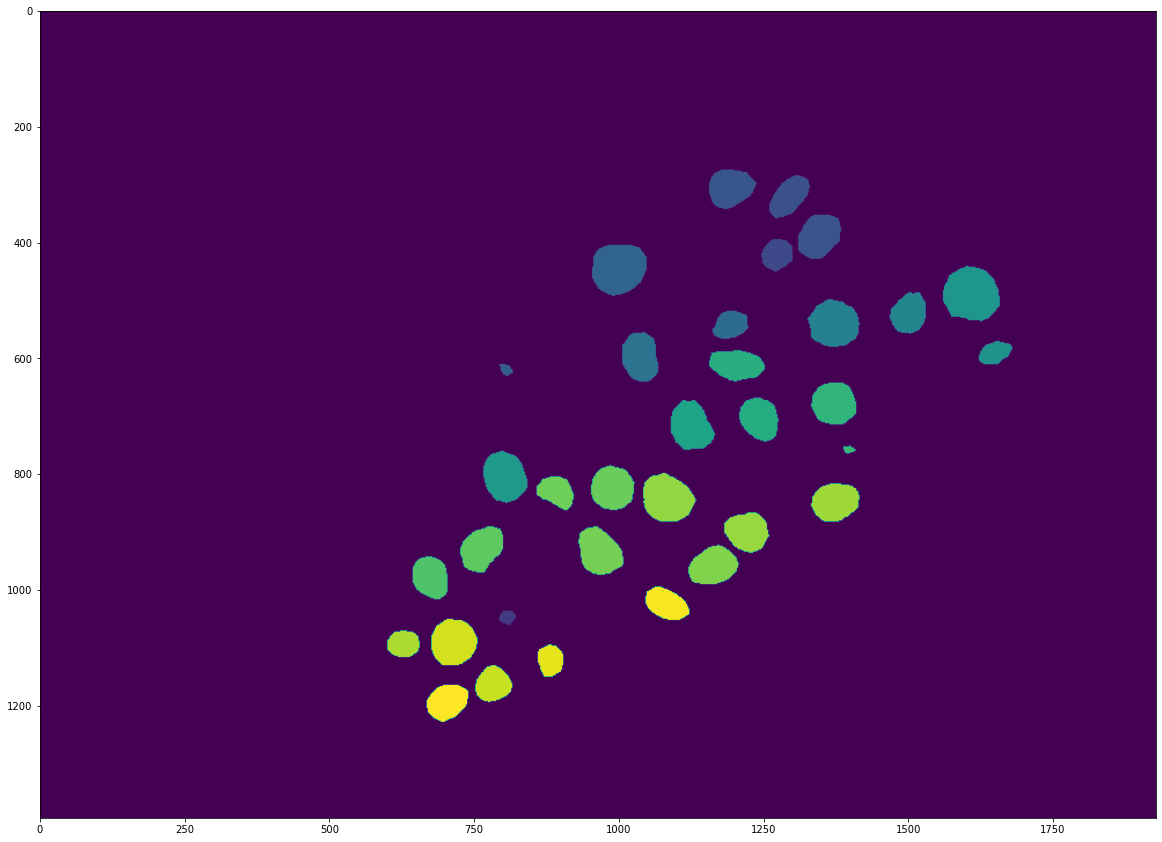

In [17]:
plt.figure(figsize=(20, 20))
plt.imshow(lab[50])

In [20]:
lab_zoomed = zoom(lab, (1., .5, .5))
lab_zoomed.dtype, len(np.unique(lab_zoomed))

In [27]:
lab_zoomed0 = zoom(lab, (1., .5, .5), order=0)
lab_zoomed.dtype, len(np.unique(lab_zoomed0))

(dtype('uint16'), 503)

In [28]:
lab_zoomed1 = zoom(lab, (1., .5, .5), order=1)
lab_zoomed.dtype, len(np.unique(lab_zoomed1))

(dtype('uint16'), 503)

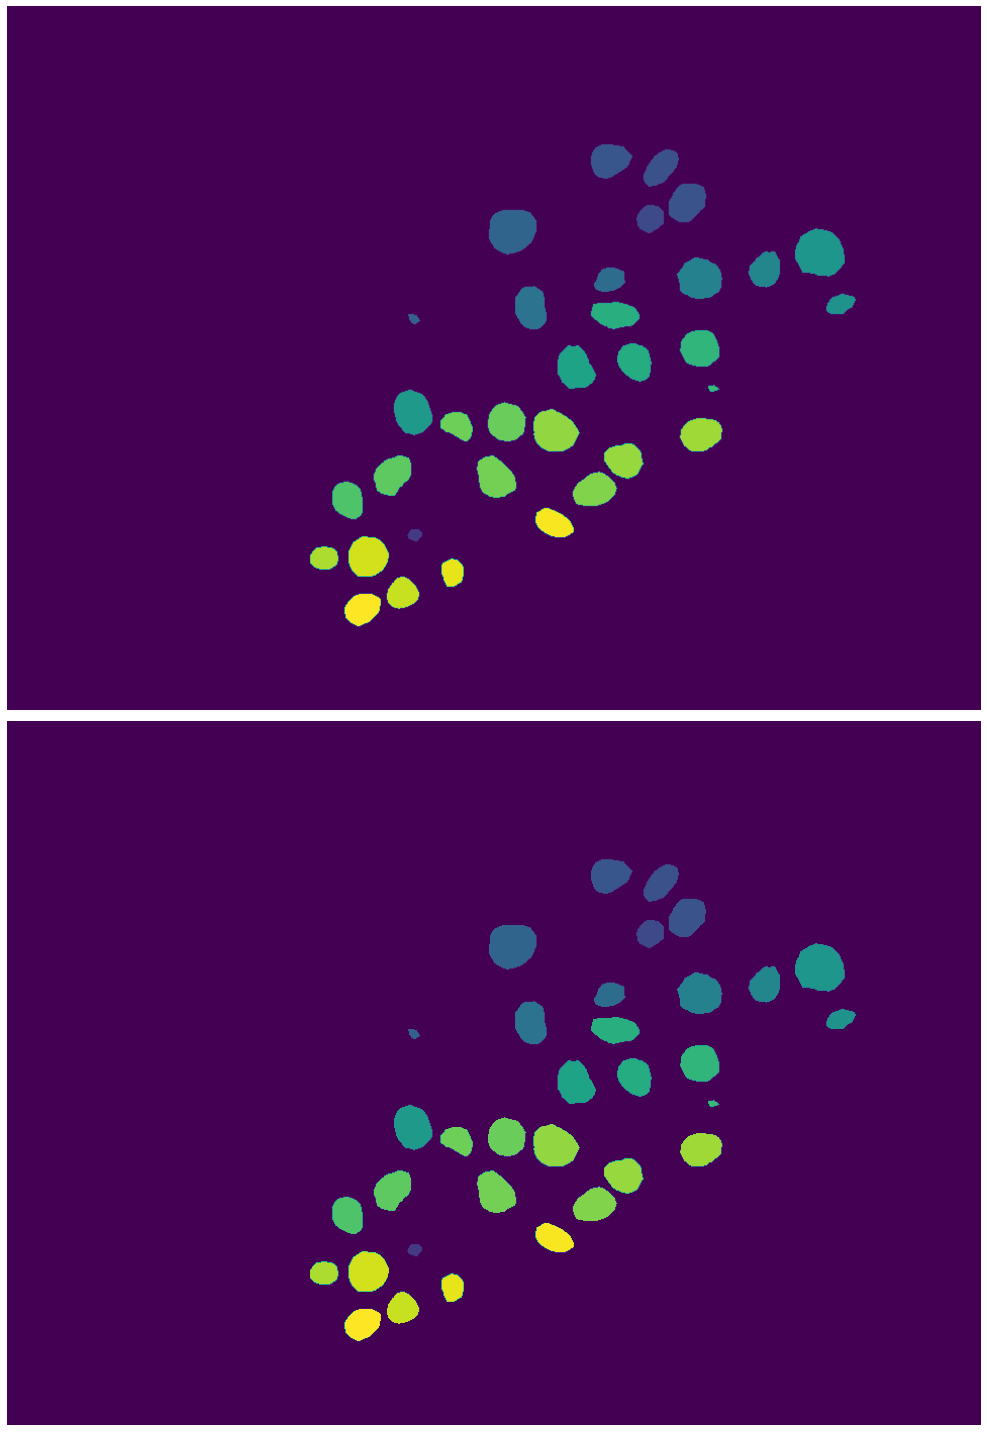

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
ax = axs[0]
ax.imshow(lab[50])
ax = axs[1]
ax.imshow(lab_zoomed0[50])
[ax.axis('off') for ax in axs]
fig.tight_layout()

## See Effect of Rescaling on Raw

In [30]:
raw.dtype, len(np.unique(raw))

(dtype('<u2'), 34)

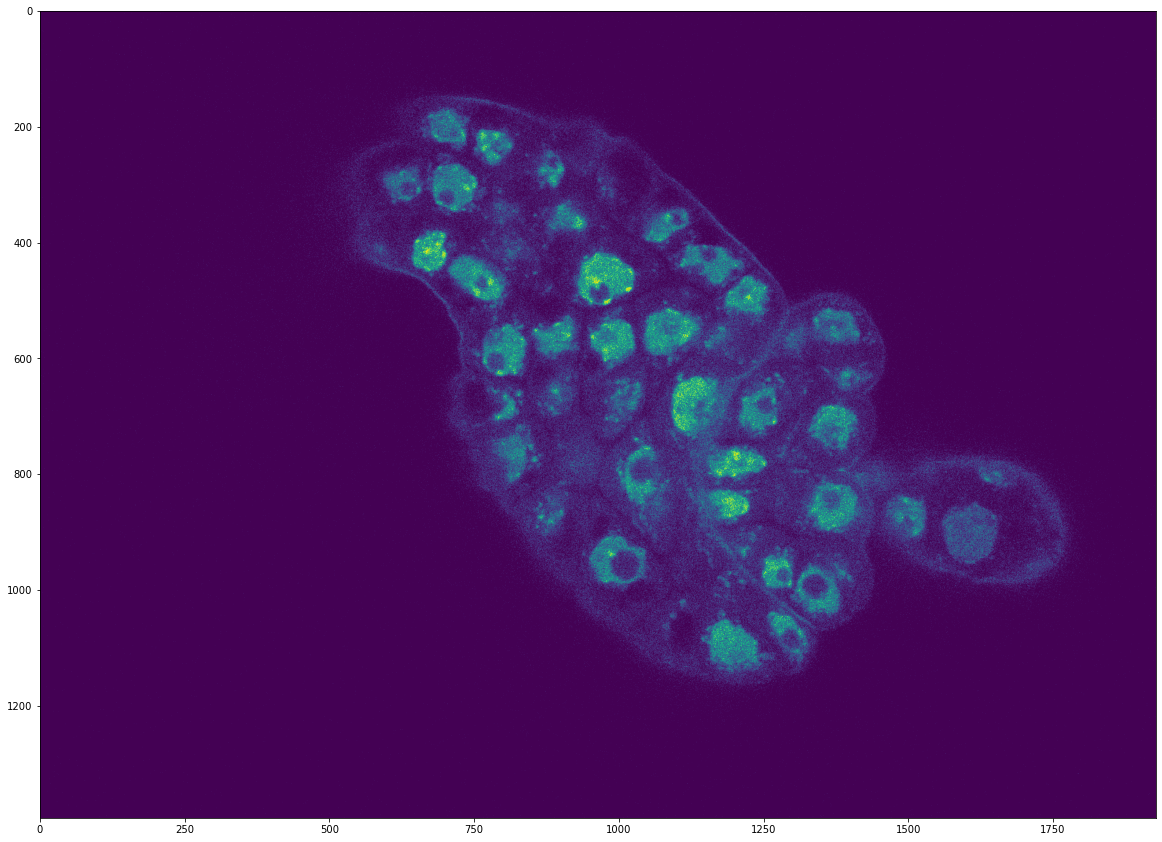

In [31]:
plt.figure(figsize=(20, 20))
plt.imshow(raw[50])

In [36]:
raw_zoomed = zoom(raw, (1., .5, .5))
raw_zoomed.dtype, len(np.unique(raw_zoomed))

(dtype('uint16'), 65530)

In [37]:
raw_zoomed0 = zoom(raw, (1., .5, .5), order=0)
raw_zoomed.dtype, len(np.unique(raw_zoomed0))

(dtype('uint16'), 34)

In [38]:
raw_zoomed1 = zoom(raw, (1., .5, .5), order=1)
raw_zoomed.dtype, len(np.unique(raw_zoomed1))

(dtype('uint16'), 65057)

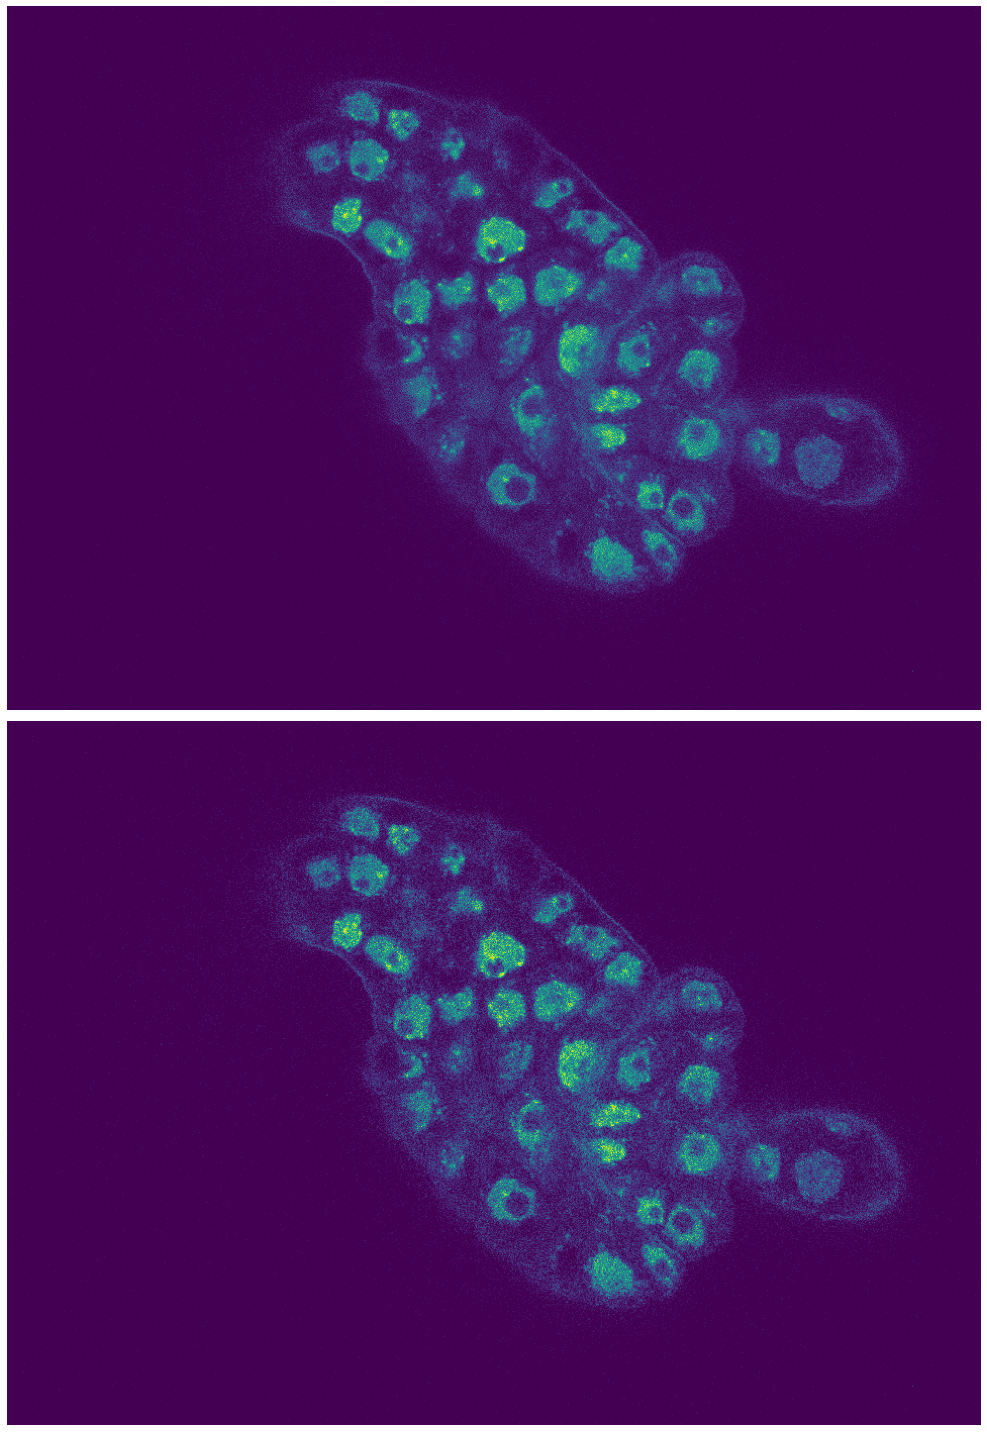

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
ax = axs[0]
ax.imshow(raw_zoomed[50])
ax = axs[1]
ax.imshow(raw_zoomed0[50])
[ax.axis('off') for ax in axs]
fig.tight_layout()

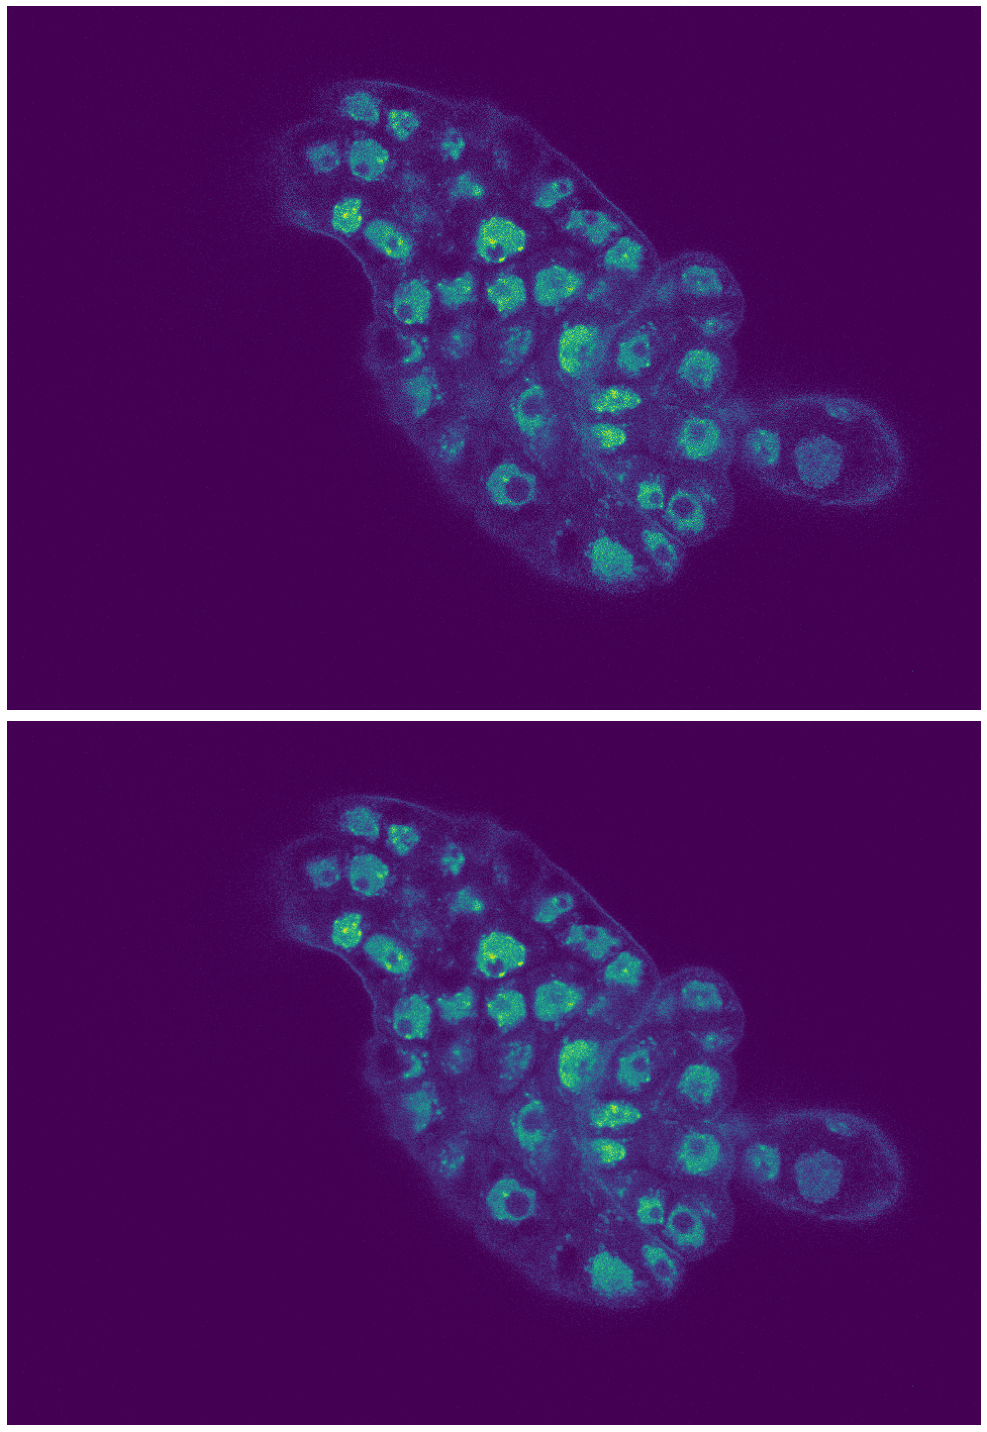

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(20, 20))
ax = axs[0]
ax.imshow(raw_zoomed[50])
ax = axs[1]
ax.imshow(raw_zoomed1[50])
[ax.axis('off') for ax in axs]
fig.tight_layout()